<a href="https://colab.research.google.com/github/soutrikmachine/deep-neural-network-construction-step-by-step/blob/master/mapper_fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install kmapper
import kmapper as km
import numpy as np
from sklearn.manifold import TSNE
import pylab
import matplotlib.pyplot as plt

Upload the MNIST dataset 

In [11]:
from keras.datasets import fashion_mnist 
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X = train_X[:5000]
train_Y = train_Y[:5000]
test_X = test_X[:2000]
test_Y = test_Y[:2000]

4423680/4422102 [==============================] - 2s 0us/step


Preprocessing

In [0]:
train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.
train_X_reshaped = train_X.reshape((len(train_X), np.prod(train_X.shape[1:])))
test_X_reshaped = test_X.reshape((len(test_X), np.prod(test_X.shape[1:])))

t-SNE on MNIST dataset

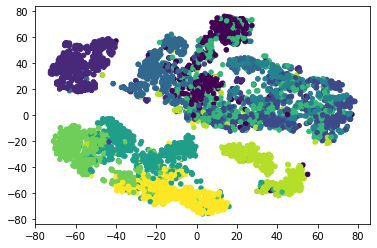

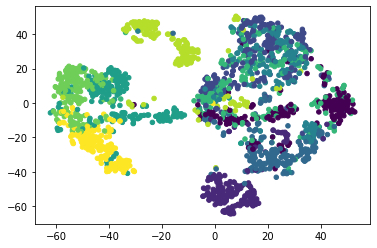

In [13]:
X_embedded = TSNE(n_components=2, perplexity=25, learning_rate=400).fit_transform(train_X_reshaped)
X_embedded.shape 
pylab.scatter(X_embedded[:, 0], X_embedded[:, 1],20,train_Y)
pylab.show()
X_embedded_test = TSNE(n_components=2, perplexity=25, learning_rate=400).fit_transform(test_X_reshaped)
X_embedded_test.shape
pylab.scatter(X_embedded_test[:, 0], X_embedded_test[:, 1], 20, test_Y)
pylab.show()

Kepler Mapper for TDA based clustering

In [14]:
# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(X_embedded, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, X_embedded, cover=km.Cover(n_cubes=10))

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (5000, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 1330 edges and 949 nodes in 0:00:00.450895.


Visualize the result

In [16]:
mapper.visualize(graph, path_html="fashion_mnist_keplermapper_output.html", title="fashion_mnist(n_samples=5000)")

Wrote visualization to: fashion_mnist_keplermapper_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>fashion_mnist(n_samples=5000) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercas